In [1]:
import os
import sys
sys.path.insert(1, '/home/elinfi/MasterCode/src/class/')
sys.path.append('/home/elinfi/MasterCode/notebooks/plotting')

import numpy as np
import comparison as comp
import plot_differences as plotd

from data_preparation import DataPreparation
from plot_replicates import plot_replicates

In [2]:
path_org = '/home/elinfi/coolers/HiC_wt_001.mcool'
path_mod = '/home/elinfi/coolers/HiC_wt_002.mcool'

resolution = 16000
#region = 'chr4'
#region = 'chr4:5M-7M' # region of genome
#region = 'chr19:13807597-16807597'
#region = 'chr14:33408661-36408661'
#region = 'chr6:124121218-127121218'
region = 'chr10:6351511-10351511'
balance = True

# create objects of class
org = DataPreparation(path_org, resolution, region, balance).matrix
mod = DataPreparation(path_mod, resolution, region, balance).matrix
#mod = np.load('/home/elinfi/MasterCode/data/simulations/chr10:6351511-10351511_k_2.npy')

save_img = True
save_data = False
PATH = '/home/elinfi/MasterCode/data/simulations/'
PATH_IMG = 'Replicates'

# Wild type replicates

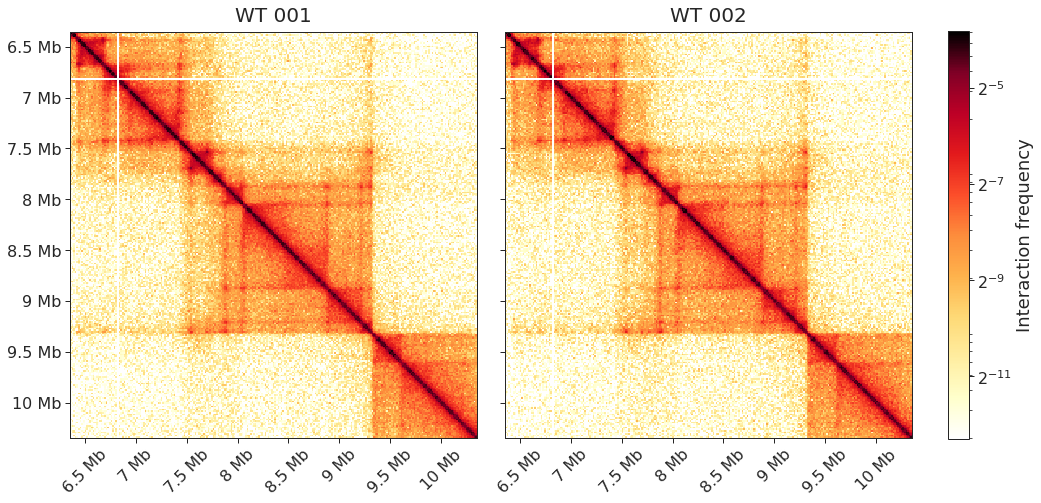

In [3]:
plot_replicates(org, mod, region, save=save_img)
if save_data==True:
    np.save(os.path.join(PATH, f'{region}_org.npy'), org)
    np.save(os.path.join(PATH, f'{region}_mod.npy'), mod)

# Subtraction

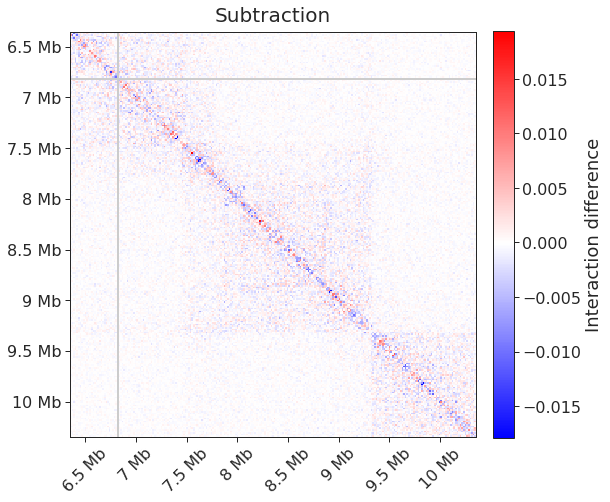

In [4]:
subdiff = comp.subtraction(org, mod)
if save_data:
    np.save(os.path.join(PATH, f'{region}_sub.npy'), subdiff)
plotd.plot_subtraction_norm(subdiff, region, save=save_img, path=PATH_IMG)

# Relative difference

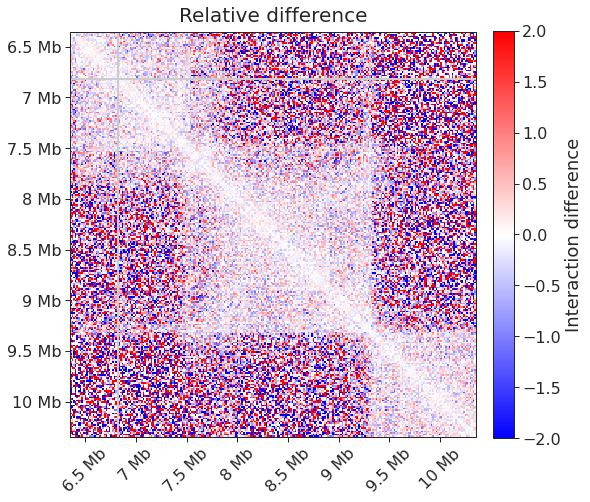

In [5]:
reldiff = comp.relative_difference(org, mod)
if save_data:
    np.save(os.path.join(PATH, f'{region}_reldiff.npy'), reldiff)
    
plotd.plot_reldiff_norm(reldiff, region, save=save_img, path=PATH_IMG)

# Log fold change

In [6]:
# create objects of class
org = DataPreparation(path_org, resolution, region, balance).matrix
mod = DataPreparation(path_mod, resolution, region, balance).matrix
#mod = np.load('/home/elinfi/MasterCode/data/simulations/chr10:6351511-10351511.npy')

ratio = comp.fold_change(org, mod)

if save_data:
    np.save(os.path.join(PATH, f'{region}_ratio.npy'), ratio)

#np.savetxt('/home/elinfi/MasterCode/data/ratio_raw.csv', ratio, delimiter=',')
#plotd.plot_fold_change(ratio, region, save=True)

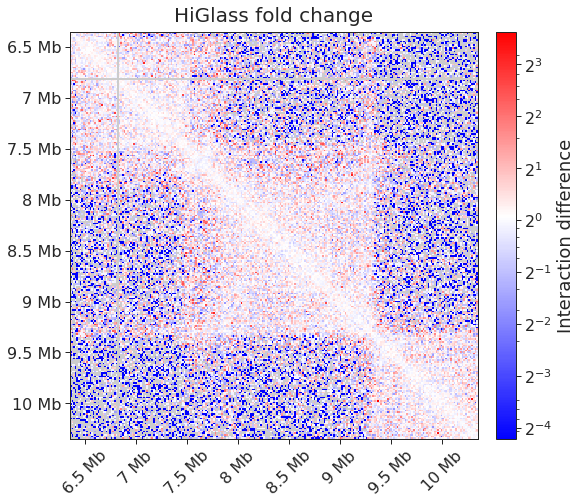

In [7]:
plotd.plot_fold_change_higlass(ratio, region, save=save_img, path=PATH_IMG)

/home/elinfi/MasterCode/src/class/mid_point_log_norm.py:15: RuntimeWarning: invalid value encountered in log2
  return np.ma.array(np.interp(np.log2(result), x, y), mask=result.mask, copy=False)


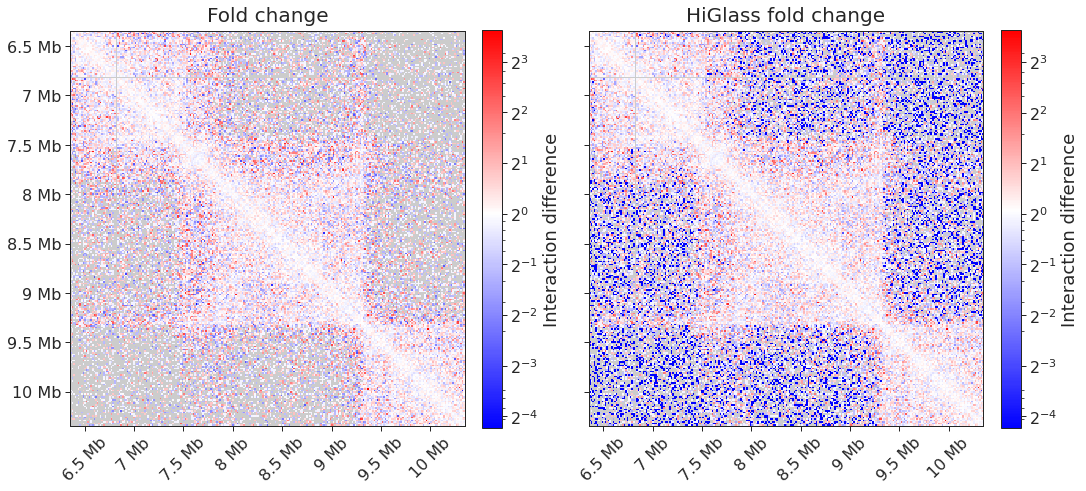

In [8]:
plotd.plot_fold_change_two(ratio, region, save=save_img, path=PATH_IMG)

# Pseudocount

/home/elinfi/MasterCode/src/class/mid_point_log_norm.py:15: RuntimeWarning: invalid value encountered in log2
  return np.ma.array(np.interp(np.log2(result), x, y), mask=result.mask, copy=False)


0.053521496507140186 -2.9276719019099557
0.6145259266233333 -0.4869041594530073
0.885446095228521 -0.12166369856587875
0.9829992748675261 -0.017146896508155967
12.305200836535855 2.510022005248699
1.608129553079155 0.4750717353466563
1.1298957989585297 0.12212541516130473
1.0185168012571497 0.01834745262834035


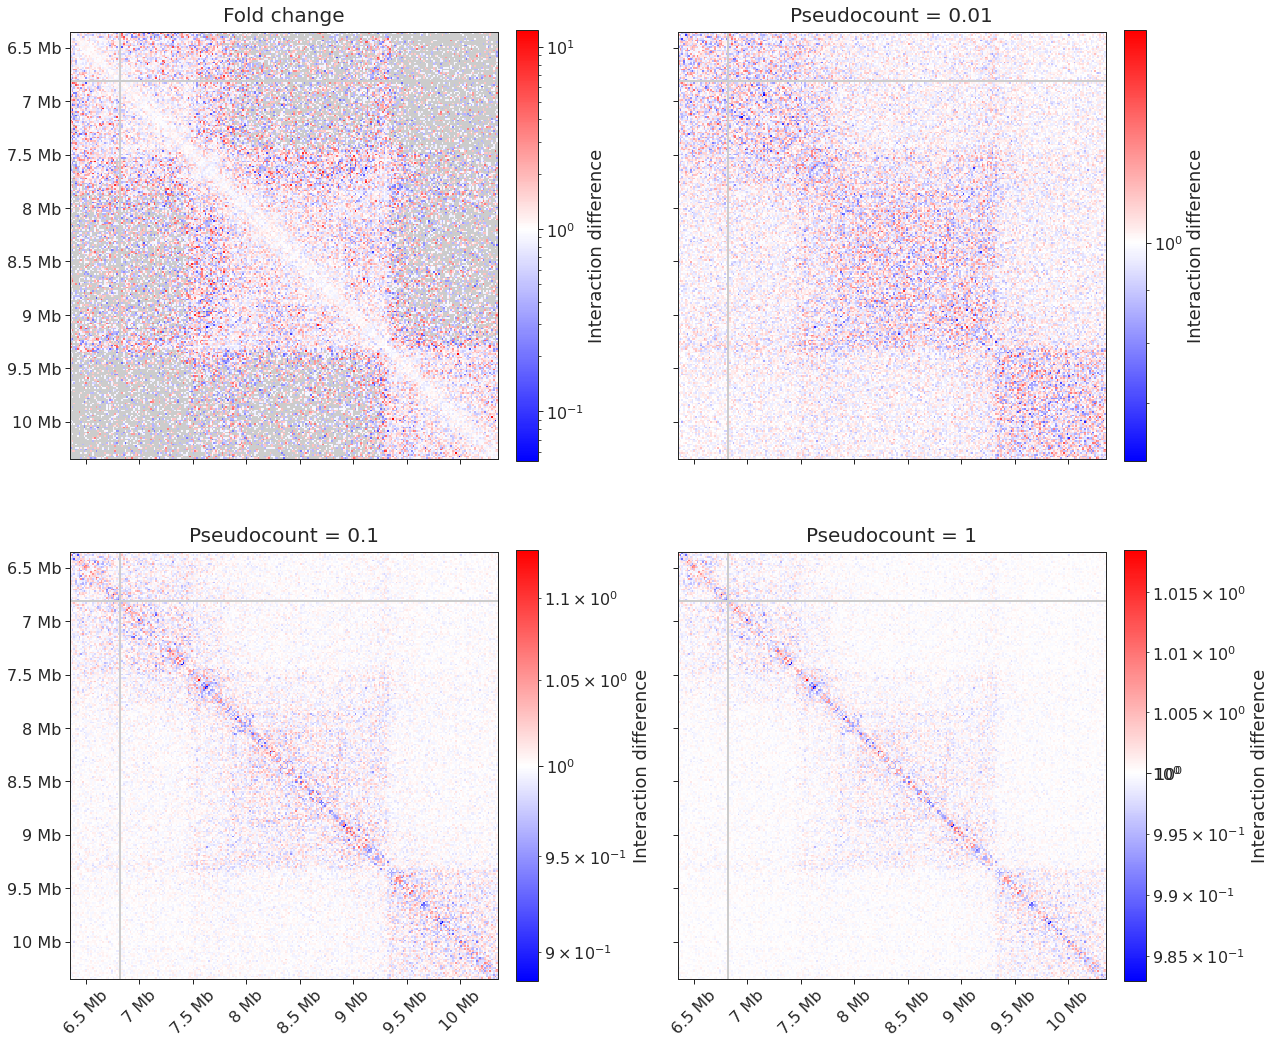

In [9]:
# create objects of class
org = DataPreparation(path_org, resolution, region, balance).matrix
mod = DataPreparation(path_mod, resolution, region, balance).matrix
#mod = np.load('/home/elinfi/MasterCode/data/simulations/chr10:6351511-10351511.npy')

p1 = comp.pseudo_diff(org, mod, 0.01)
p2 = comp.pseudo_diff(org, mod, 0.1)
p3 = comp.pseudo_diff(org, mod, 1)
p0 = comp.fold_change(org, mod)

if save_data:
    np.save(os.path.join(PATH, f'{region}_p001.npy'), p1)
    np.save(os.path.join(PATH, f'{region}_p01.npy'), p2)
    np.save(os.path.join(PATH, f'{region}_p1.npy'), p3)

plotd.plot_pseudocount(p0, p1, p2, p3, region, save=save_img, path=PATH_IMG)

a, b, c, d = np.nanmin(p0[p0>0]), np.nanmin(p1), np.nanmin(p2), np.nanmin(p3)
e, f, g, h = np.nanmax(p0), np.nanmax(p1), np.nanmax(p2), np.nanmax(p3)

for i in (a, b, c, d, e, f, g, h):
    print(i, np.log(i))


# Poisson distribution

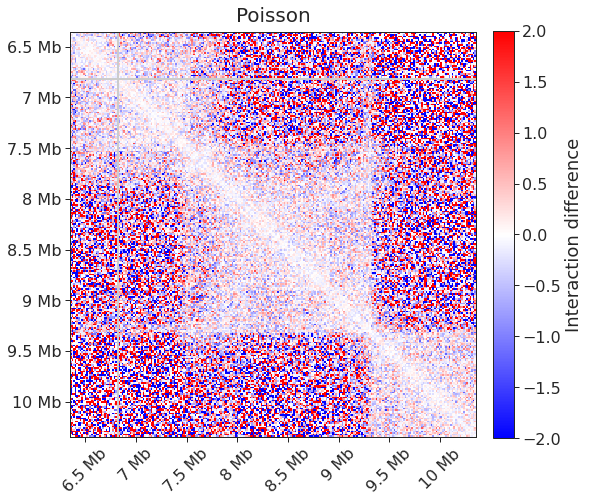

In [10]:
# create objects of class
org = DataPreparation(path_org, resolution, region, balance).matrix
mod = DataPreparation(path_mod, resolution, region, balance).matrix
#mod = np.load('/home/elinfi/MasterCode/data/simulations/chr10:6351511-10351511.npy')
poisson = comp.poisson(org, mod)

if save_data:
    np.save(os.path.join(PATH, f'{region}_poisson.npy'), poisson)
    
plotd.plot_poisson(poisson, region, save=save_img, path=PATH_IMG)

Roten av tall som er mindre enn 1 blir større, så derfor mindre range

(100,)
(100,)


<ipython-input-11-4c4b4cdc2d45>:11: RuntimeWarning: divide by zero encountered in log2
  plt.plot(x, np.log2(y))


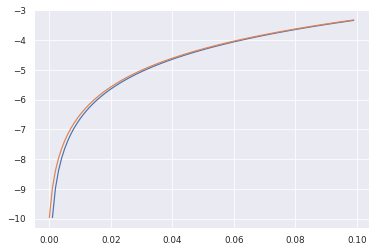

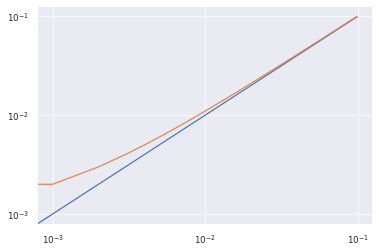

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# use seaborn style
sns.set_theme('paper')
sns.set_style('darkgrid')
y = np.arange(0, 0.1, 0.001)
print(y.shape)
x = np.arange(0, 0.1, 0.001)
print(x.shape)
plt.plot(x, np.log2(y))
plt.plot(x, np.log2(y + 0.001))
plt.show()

plt.loglog(x, y)
plt.loglog(x, y+0.001)